In [1]:
!pip install signate

from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth


auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'signate.json'", fields="files(id)").execute()
signate_api_key = results.get('files', [])

filename = "/root/.signate/signate.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=signate_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

     |████████████████████████████████| 138 kB 9.7 MB/s 
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=0da5717018c7acb7c3dfd536bfc69ee2c59eadcc985375c69fda1aa62e6a19cf
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.8 which is incompatible.
google-colab 1.0.0 requires six~=1.15.0, but you have six 1.16.0 which is i

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/__ini

Download 100%.


In [2]:
! signate list

  competitionId  title                                                                                      closing     prize                  submitters
---------------  -----------------------------------------------------------------------------------------  ----------  -------------------  ------------
              1  【練習問題】銀行の顧客ターゲティング                                                       -                                        5391
             24  【練習問題】お弁当の需要予測                                                               -                                        6659
             27  【練習問題】Jリーグの観客動員数予測                                                        -                                        1525
            100  【練習問題】手書き文字認識                                                                 -           Knowledge                     203
            102  【練習問題】タイタニックの生存予測                                                         -           Knowledge                    1258
 

In [3]:
! signate files --competition-id=520
! signate download --competition-id=520

  fileId  name                                           title                                                     size  updated_at
--------  ---------------------------------------------  ----------------------------------------------------  --------  -------------------
    2350  PBL05_h_exercise4_question.pdf                 PBL05_不良個所自動検出(木材)_h.演習④設問               1176226  2021-09-08 18:20:38
    2351  PBL05_i_exercise4_supplementary-documents.pdf  PBL05_不良個所自動検出(木材)_i.演習④ガイドコンテンツ   1053620  2021-09-08 18:20:40
    2381  README.md                                      配布データの説明用テキスト                                3135  2021-09-09 12:16:16
    2383  train.zip                                      1. 学習用                                             82694303  2021-09-09 15:10:26
    2384  test.zip                                       2. 評価用                                             91644093  2021-09-09 14:26:59
    2385  sample_submission.zip                          3. コンペ投稿用         

In [4]:
! unzip train.zip
! unzip train/train_annotations.zip 
! unzip train/train_images.zip

Archive:  train.zip
   creating: train/
  inflating: train/train.csv         
  inflating: train/train_annotations.zip  
 extracting: train/train_images.zip  
Archive:  train/train_annotations.zip
   creating: train_annotations/
  inflating: train_annotations/train_63_04.png  
  inflating: train_annotations/train_63_10.png  
  inflating: train_annotations/train_63_11.png  
  inflating: train_annotations/train_63_05.png  
  inflating: train_annotations/train_63_07.png  
  inflating: train_annotations/train_63_06.png  
  inflating: train_annotations/train_63_02.png  
  inflating: train_annotations/train_63_03.png  
  inflating: train_annotations/train_63_01.png  
  inflating: train_annotations/train_63_00.png  
  inflating: train_annotations/train_31_05.png  
  inflating: train_annotations/train_31_04.png  
  inflating: train_annotations/train_31_03.png  
  inflating: train_annotations/train_31_02.png  
  inflating: train_annotations/train_31_00.png  
  inflating: train_annotations/train

In [5]:
! unzip test.zip
! unzip test/test_images.zip

Archive:  test.zip
   creating: test/
  inflating: test/test.csv           
 extracting: test/test_images.zip    
Archive:  test/test_images.zip
   creating: test_images/
  inflating: test_images/test_72_00.png  
  inflating: test_images/test_27_15.png  
  inflating: test_images/test_27_01.png  
  inflating: test_images/test_44_15.png  
  inflating: test_images/test_44_01.png  
  inflating: test_images/test_11_00.png  
  inflating: test_images/test_16_09.png  
  inflating: test_images/test_62_11.png  
  inflating: test_images/test_39_01.png  
  inflating: test_images/test_62_05.png  
  inflating: test_images/test_48_01.png  
  inflating: test_images/test_60_00.png  
  inflating: test_images/test_35_01.png  
  inflating: test_images/test_56_01.png  
  inflating: test_images/test_03_00.png  
  inflating: test_images/test_03_01.png  
  inflating: test_images/test_56_00.png  
  inflating: test_images/test_35_14.png  
  inflating: test_images/test_35_00.png  
  inflating: test_images/test_6

In [6]:
! unzip sample_submission.zip

Archive:  sample_submission.zip
   creating: sample_submission/
  inflating: sample_submission/requirements.txt  
  inflating: sample_submission/sample_code.ipynb  
  inflating: sample_submission/sample_submit.csv  


In [7]:
! ls

adc.json				       test
PBL05_h_exercise4_question.pdf		       test_images
PBL05_i_exercise4_supplementary-documents.pdf  test.zip
README.md				       train
sample_data				       train_annotations
sample_submission			       train_images
sample_submission.zip			       train.zip


In [8]:
# Googleドライブのマウント
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


0    472
1     18
Name: anomaly_flag, dtype: int64
76
['train_00', 'train_01', 'train_02', 'train_03', 'train_04', 'train_05', 'train_06', 'train_07', 'train_08', 'train_09', 'train_10', 'train_11', 'train_12', 'train_13', 'train_14', 'train_15', 'train_16', 'train_17', 'train_18', 'train_19', 'train_20', 'train_21', 'train_22', 'train_23', 'train_24', 'train_25', 'train_26', 'train_27', 'train_28', 'train_29', 'train_30', 'train_32', 'train_33', 'train_34', 'train_35', 'train_36', 'train_37', 'train_38', 'train_39', 'train_40', 'train_41', 'train_42', 'train_43', 'train_44', 'train_45', 'train_46', 'train_47', 'train_48', 'train_49', 'train_50', 'train_51', 'train_52', 'train_53', 'train_54', 'train_55', 'train_56', 'train_57', 'train_58', 'train_59', 'train_60', 'train_61', 'train_62', 'train_64', 'train_65', 'train_66', 'train_67', 'train_68', 'train_69', 'train_70', 'train_71', 'train_72', 'train_73', 'train_74', 'train_75', 'train_76', 'train_77']
369
103
18
train:  (369, 256, 256

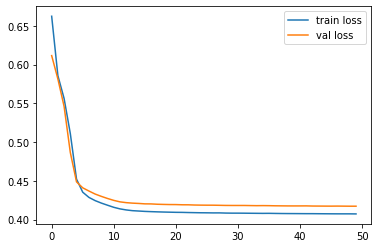

In [9]:
# ライブラリのインポート
import os
import glob
import random
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# matplotlibの日本語表示を有効にする設定
plt.rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP'] 
from PIL import Image
import cv2

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam

'''
定数の指定
'''

# 画像サイズ
image_size = (256, 256)

# テーブルデータのパス
train_label_path = './train/train.csv' # 学習データのラベル
test_label_path = './test/test.csv' # テストデータのラベル
sub_label_path = './sample_submission/sample_submit.csv' # 提出用データ

# 提出用データの保存先
SUB_PATH = '/content/drive/My Drive/AIQuest2021/PBL_05_不良個所自動検出/Phase2/defective/submit/defective_keras_baseline.csv'

'''
データの読み込み
'''

# データの読み込み
train = pd.read_csv(train_label_path, sep=',')
test = pd.read_csv(test_label_path, sep=',')
sub = pd.read_csv(sub_label_path, sep=',', header=None)

# 画像データのファイルパスの取得
train_images_path_list = sorted(glob.glob('./train_images/*.png'))
train_annotations_path_list = sorted(glob.glob('./train_annotations/*.png'))
test_images_path_list = sorted(glob.glob('./test_images/*.png'))

'''
データセット作成
'''

# 個体(object)単位で「異常あり」画像の枚数を算出
train_object = train.groupby('object_id')['anomaly_flag'].sum().reset_index()
print(train['anomaly_flag'].value_counts())

# 「異常なし」個体のIDだけを抽出する
train_normal_id_list = train_object.query('anomaly_flag == 0')['object_id'].unique().tolist()
print(len(train_normal_id_list))
print(train_normal_id_list)

# 学習用(train), 検証用(val)にIDを分ける
train_id_list, val_id_list = train_test_split(train_normal_id_list, test_size=15, random_state=42)

# 学習用(train), 検証用(val), 異常あり(train_anomaly)の画像ファイルパスをそれぞれ取得
train_normal_images_path_list = list(filter(lambda x: '_'.join(x.split('/')[-1].split('_')[:-1]) in train_id_list, train_images_path_list))
val_normal_images_path_list = list(filter(lambda x: '_'.join(x.split('/')[-1].split('_')[:-1]) in val_id_list, train_images_path_list))
train_anomaly_images_path_list = list(filter(lambda x: '_'.join(x.split('/')[-1].split('_')[:-1]) not in train_normal_id_list, train_images_path_list))

print(len(train_normal_images_path_list))
print(len(val_normal_images_path_list))
print(len(train_anomaly_images_path_list))

# 前処理を行い、モデルに画像を入力できる形式に変更する
def preprocess_data(image_path_list):
    
    for i, image_path in enumerate(image_path_list):
        # 1. 画像の読み込み
        image = Image.open(image_path)
        # 2. 画像のリサイズ
        image = image.resize(image_size)
        # 3. 画像配列に新たな次元の追加
        image = np.expand_dims(image, axis=0)

        # 4. 画像配列を3で作った次元で結合する
        if i == 0:
            array = image
        else:
            array = np.concatenate([array, image])
    # 5. 画像配列を構成する数値のスケーリング
    array =  array / 255.0
    return array

# 関数preprocess_dataの実行
train_X = preprocess_data(train_normal_images_path_list)
val_X = preprocess_data(val_normal_images_path_list)
train_anomaly_X = preprocess_data(train_anomaly_images_path_list)
test_X = preprocess_data(test_images_path_list)

print('train: ', train_X.shape)
print('val: ', val_X.shape)
print('train_anomaly: ', train_anomaly_X.shape)
print('test: ', test_X.shape)

'''
モデルの定義
'''

# 乱数の固定
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

# モデルの初期化
model = Sequential()

# Encoder
model.add(Conv2D(16, (3, 3), padding='same', input_shape=(image_size[0], image_size[1], 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(8, (3, 3), padding='same'))
model.add(MaxPooling2D(2, 2))
model.add(Activation("relu"))

# Decoder
model.add(UpSampling2D(size=(2, 2)))
model.add(Conv2D(16, (3, 3),padding='same'))

model.add(UpSampling2D(size=(2, 2)))
model.add(Conv2D(3, kernel_size=(3, 3), padding='same'))
model.add(Activation("sigmoid"))

# 損失関数、最適化手法の指定
model.compile(loss='binary_crossentropy', optimizer=Adam())

print(model.summary())

'''
学習
'''

# 学習の実行
results = model.fit(train_X, train_X,
                   epochs=50,
                   batch_size=32,
                   shuffle=True,
                   validation_data=(val_X, val_X),
                   verbose=0)

'''
学習過程のグラフ化
'''

train_loss = results.history['loss']
val_loss = results.history['val_loss']

n_epochs = len(train_loss)

plt.plot(range(n_epochs), train_loss, label='train loss')
plt.plot(range(n_epochs), val_loss, label='val loss')
plt.legend()
plt.show()

In [10]:
'''
学習済みモデルによる推論
'''

def get_anomaly_score(input_data, phase, max_num):
    print(f'=========={phase}==========')
    output_data = model.predict(input_data)
    anomaly_score_list = []
    for i in range(len(output_data)):

        # 入力画像と出力画像の差分の絶対値を取る
        diff_data = np.fabs(input_data[i] - output_data[i])
        # 「異常スコア」の算出
        anomaly_score = diff_data.sum()
        anomaly_score_list.append(anomaly_score)
        
        if i > max_num:
            continue
            
        # train_anomalyだけは、アノテーション画像も一緒に出力する
        if phase == 'train_anomaly':
            fig, ax = plt.subplots(1, 4, figsize=(20, 10))
            annot = cv2.resize(cv2.imread(train_annotations_path_list[i], 0), image_size)
            ax[3].imshow(annot, cmap='gray')
            ax[3].set_title('annot')
        else:
            fig, ax = plt.subplots(1, 3, figsize=(20, 10))
        
        # 1番左に入力画像を描画
        ax[0].imshow(input_data[i])
        ax[0].set_title('input')
        # 左から2番目に出力画像を描画
        ax[1].imshow(output_data[i])
        ax[1].set_title('output')
        
        # 入力画像と出力画像の差分を描画
        diff_data2 = (diff_data - diff_data.min()) / (diff_data.max() - diff_data.min())
        print(diff_data.sum())
        ax[2].imshow(diff_data2)
        ax[2].set_title('diff')
        
        plt.show()
        
    return anomaly_score_list

# 異常スコアの算出」と推論結果の可視化
val_anomaly_score_list = get_anomaly_score(val_X, 'val', 5)
train_anomaly_anomaly_score_list = get_anomaly_score(train_anomaly_X, 'train_anomaly', 5)
test_anomaly_score_list = get_anomaly_score(test_X, 'test', 5)

# 異常スコアのヒストグラム
plt.figure(dpi=120)
plt.hist(val_anomaly_score_list, label='normal', alpha=0.5)
plt.hist(train_anomaly_anomaly_score_list, label='abnormal', alpha=0.5)
plt.hist(test_anomaly_score_list, label='test', alpha=0.5)
plt.legend()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [11]:
'''
テストデータの予測値の決定
'''

# 閾値の設定
th_anomaly_score = 3500

# 評価用データの各画像に対する予測結果を作成
pred_list = np.where(np.array(test_anomaly_score_list) >= th_anomaly_score, 1, 0)
print(np.unique(pred_list, return_counts=True))

# 評価用テーブルデータに代入
test['pred'] = pred_list
print(test)

# 『個体』単位で「異常あり」と判定された画像の枚数を集計する
test_object = test.groupby('object_id')['pred'].sum().reset_index()

# 1枚でも「異常あり」と判定された画像を含む個体は1: 「異常あり」、それ以外は0: 「異常なし」とする
test_object['anomaly_flag'] = test_object['pred'].apply(lambda x: 1 if x > 0 else 0)
print(test_object['anomaly_flag'].value_counts())
print(test_object)

(array([0, 1]), array([368, 103]))
    object_id    image_id  pred
0     test_00  test_00_00     0
1     test_00  test_00_01     0
2     test_00  test_00_02     0
3     test_00  test_00_03     0
4     test_00  test_00_04     0
..        ...         ...   ...
466   test_76  test_76_07     0
467   test_76  test_76_08     0
468   test_76  test_76_09     0
469   test_76  test_76_10     0
470   test_76  test_76_11     0

[471 rows x 3 columns]
0    40
1    37
Name: anomaly_flag, dtype: int64
   object_id  pred  anomaly_flag
0    test_00     0             0
1    test_01     0             0
2    test_02     0             0
3    test_03     7             1
4    test_04     0             0
..       ...   ...           ...
72   test_72     3             1
73   test_73     4             1
74   test_74     0             0
75   test_75     1             1
76   test_76     0             0

[77 rows x 3 columns]


In [12]:
'''
提出用ファイルの作成
'''

# 提出用ファイルデータの読み込み
sub = pd.read_csv(sub_label_path, sep=',', header=None)

# サンプル投稿用ファイルの2列目に予測値を代入
sub[1] = test_object['anomaly_flag']
print(sub.head())

# 提出用ファイルの保存
sub.to_csv(SUB_PATH, index=False, header=False)

         0  1
0  test_00  0
1  test_01  0
2  test_02  0
3  test_03  1
4  test_04  0
